# Data analysis

In this notebook, I am going to analyze the dataset. First, we proceed by installing the necessary libraries we are going to use for reading and analysing the data.

In [1]:
!pip install h5py
!pip install matplotlib
!pip install pandas

%matplotlib inline

## Training set
First, we start by reading the images from the dataset.

In [2]:
import h5py
import numpy as np
import pandas as pd

path = "../data/Train_EnergyGround_alt5200m_qgsii_fluka_N44971.h5"

with h5py.File(path, "r") as f:
    data = np.array(f["data"])
    info = pd.read_hdf(path, key="info")

As we can see below, the training dataset has 44.971 samples (this could use a lot of memory while executing training) and each sample is a single-channel 80x80 image.

In [3]:
data.shape

(44971, 80, 80)

In the `info` variable we can find more data, like the energy, the number of muons and the class of each instance.

In [4]:
info

,ID_shower,E0,theta0,Nmuons,Y_class
0,0.0,62743.449219,0.0,578.0,0.0
1,1.0,40416.339844,0.0,408.0,0.0
2,2.0,61331.218750,0.0,539.0,0.0
3,3.0,57133.789062,0.0,434.0,0.0
4,4.0,61603.351562,0.0,477.0,0.0
...,...,...,...,...,...
22485,22485.0,2572.270020,0.0,13.0,1.0
22486,22486.0,3828.409912,0.0,21.0,1.0
22487,22487.0,2528.129883,0.0,30.0,1.0
22488,22488.0,3443.100098,0.0,27.0,1.0


Ok, now we know where are the labels and the number of classes in this dataset is 2 and they are more os less balanced. Each class represent:
- Class 0: Iron shower.
- Class 1: Proton shower.

In [5]:
labels = info.loc[:, "Y_class"].values
unique , counts = np.unique(labels, return_counts=True)
dict(zip(unique.astype(int), counts))

{0: 22481, 1: 22490}

## Test set
The test set contains 14.989 samples, as we can see below.

In [6]:
test_path = "../data/Test_EnergyGround_alt5200m_qgsii_fluka_N14989.h5"

with h5py.File(test_path, "r") as f:
    data_test = np.array(f["data"])
    info = pd.read_hdf(path, key="info")

print(data.shape)

(44971, 80, 80)


The classes in the test dataset are more or less balanced too.

In [7]:
labels_test = info.loc[:, "Y_class"].values
unique , counts = np.unique(labels, return_counts=True)

dict(zip(unique.astype(int), counts))

{0: 22481, 1: 22490}

## Representing two samples from the dataset
Let's see a sample of the dataset and show it as an image.

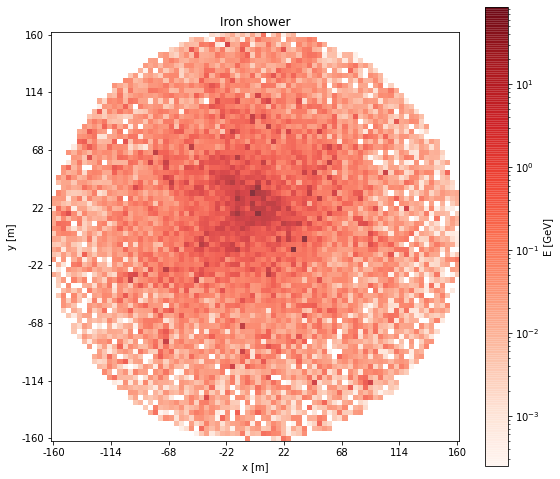

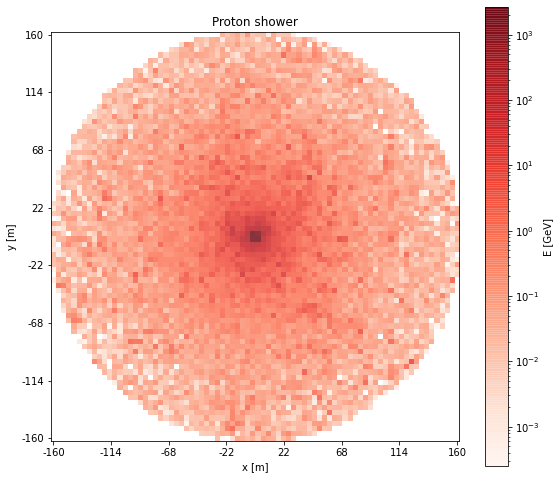

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

iron_index_train = np.where(labels==0)[0]
proton_index_train = np.where(labels==1)[0]

index_to_use = 1
label = "E [GeV]"

#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.imshow(data[iron_index_train[index_to_use],:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
plt.title("Iron shower")
plt.xlabel("x [m]")
plt.xticks(ticks = np.linspace(0,data.shape[1]-1,8), labels=np.linspace(-160,160,8).astype(int))
plt.ylabel('y [m]')
plt.yticks(ticks = np.linspace(0,data.shape[2]-1,8), labels=-1*np.linspace(-160,160,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()

index_to_use = 103
#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
plt.imshow(data[proton_index_train[index_to_use],:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
plt.title("Proton shower")
plt.xlabel("x [m]")
plt.xticks(ticks = np.linspace(0,data.shape[1]-1,8), labels=np.linspace(-160,160,8).astype(int))
plt.ylabel('y [m]')
plt.yticks(ticks = np.linspace(0,data.shape[2]-1,8), labels=-1*np.linspace(-160,160,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()